# Importing Libraries and Importing Dataset

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
url = 'https://raw.githubusercontent.com/plouis29/inst354-groupproject/main/framingham%202.csv'
heart_df = pd.read_csv(url)

In [ ]:
heart_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Data Cleaning

Dropping all rows with missing values

In [ ]:
heart_df.dropna(inplace = True)

Verifying that no duplicate rows exist in the dataframe

In [ ]:
heart_df.duplicated().values.any()

False

Verifying rows are of the appropriate data type

In [ ]:
heart_df.dtypes

,0
male,int64
age,int64
education,float64
currentSmoker,int64
cigsPerDay,float64
BPMeds,float64
prevalentStroke,int64
prevalentHyp,int64
diabetes,int64
totChol,float64


# EDA

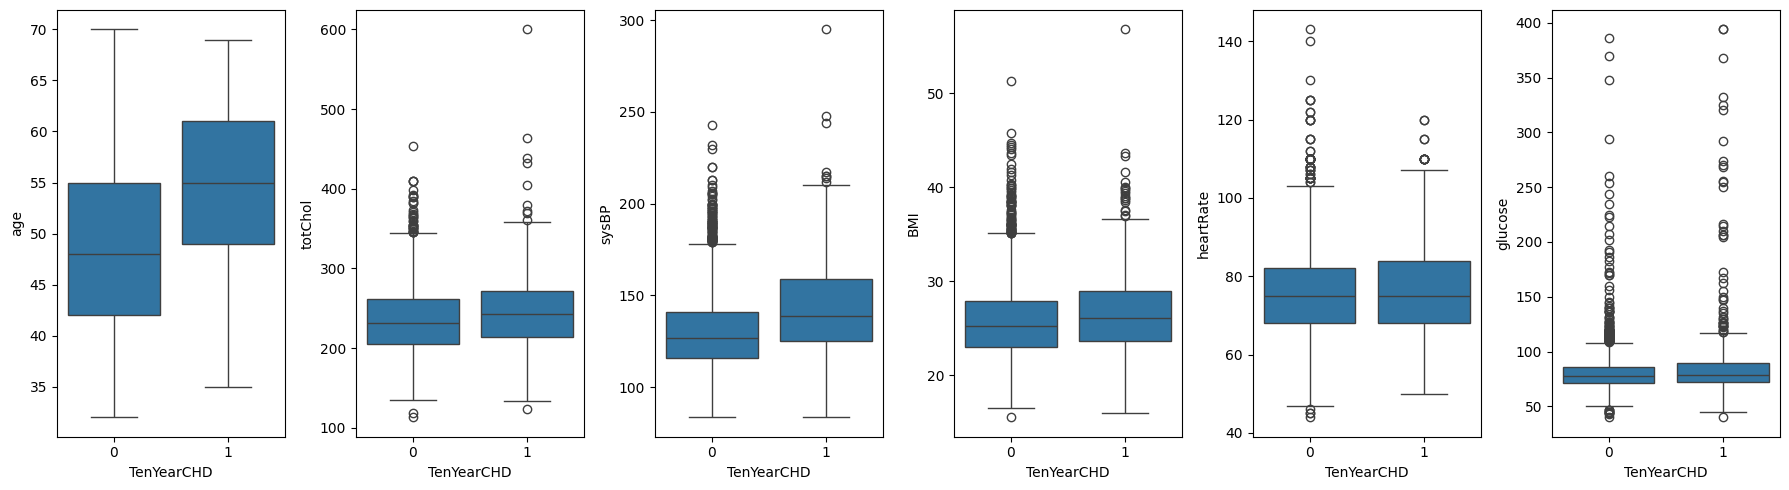

In [ ]:
fig= plt.figure(figsize=(18,5) )

for idx, feature in enumerate(['age','totChol', 'sysBP', 'BMI', 'heartRate', 'glucose']):
    fig.add_subplot(1,6,idx+1)
    _=sns.boxplot(x=heart_df["TenYearCHD"],y=heart_df[feature])

plt.tight_layout()
plt.show()

Heatmap to visualize the correalation between variables in the dataset

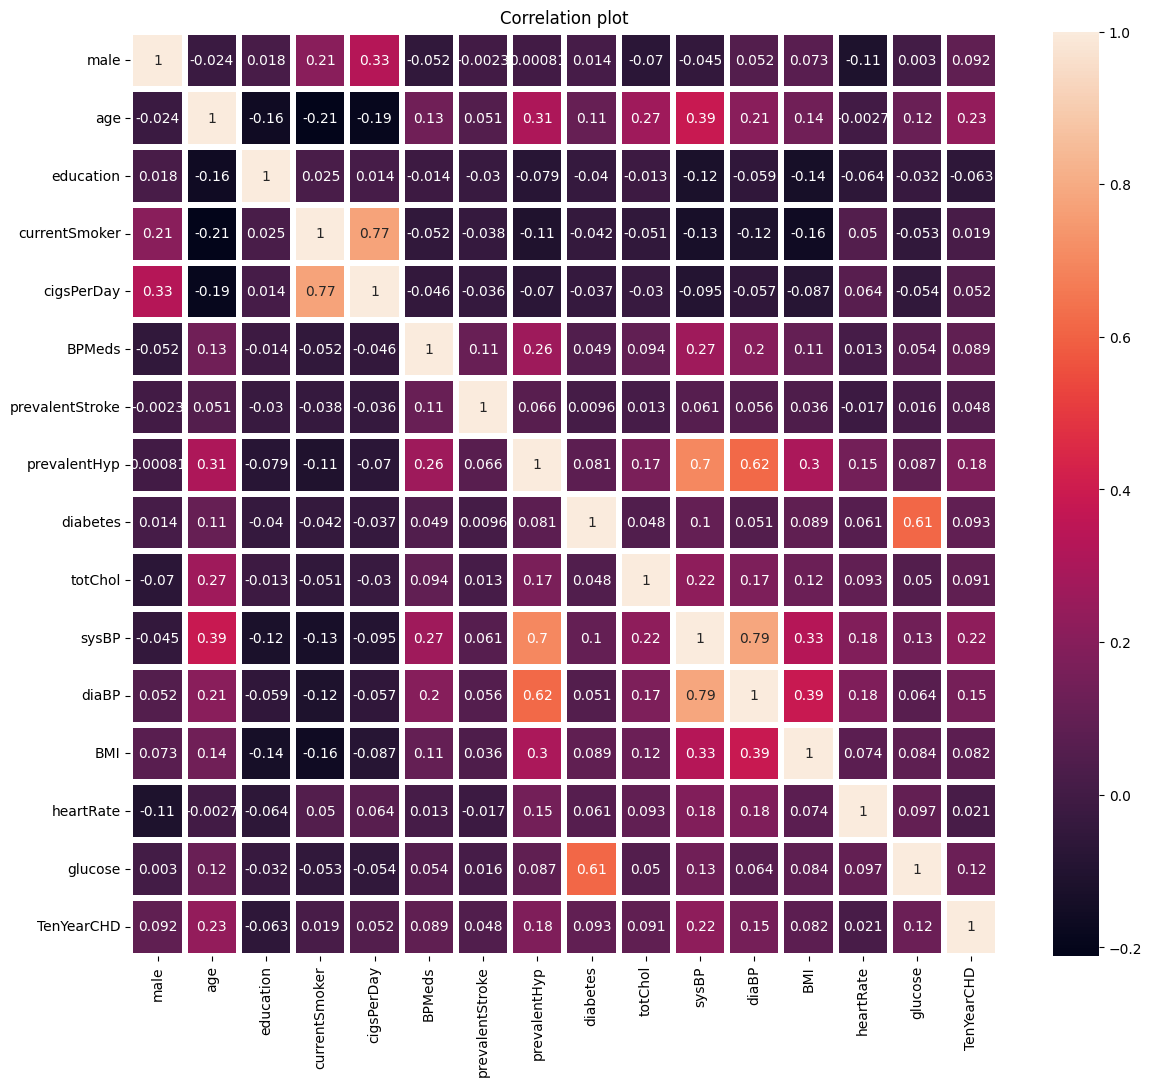

In [ ]:
plt.figure(figsize=(14, 12))
corr_plot = sns.heatmap(heart_df.corr(), annot=True, linewidths=3)
plt.title("Correlation plot")
plt.show()

Bar graph counting the number of sample for both the 1 and 0 class

<ipython-input-50-c9255fac4e8d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=heart_df, palette = 'hls')


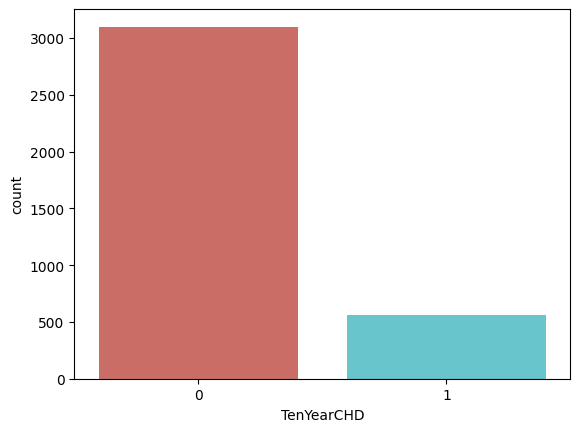

In [ ]:
sns.countplot(x='TenYearCHD', data=heart_df, palette = 'hls')
plt.show()

The bar graph shows that there is a class imbalance within the dataset

# Model Training

Feature Engineering

In [ ]:
# Dropping 'education' column
heart_df.drop(columns=['education'])

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,58,0,0.0,0.0,0,1,0,187.0,141.0,81.0,24.96,80.0,81.0,0
4232,1,68,0,0.0,0.0,0,1,0,176.0,168.0,97.0,23.14,60.0,79.0,1
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0


The 'education' column was dropped due to it have a significantly low correalation score indicating that it is not a good predictor.

Training and fitting the model on the dataset

In [ ]:
X=heart_df.iloc[:,0:-1]
y=heart_df.TenYearCHD
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.25)
LogReg=LogisticRegression()

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train,y_train)
y_pred=LogReg.predict(X_test)

In [ ]:
print('Classes', LogReg.classes_)
print('Intercept', LogReg.intercept_)
print("Coefficients", LogReg.coef_)


Classes [0 1]
Intercept [-2.02446623]
Coefficients [[ 0.19853005  0.62170625  0.02474795  0.0241783   0.24940109  0.01877407
   0.02598573  0.12648507  0.01601999  0.13828237  0.24650468  0.01823468
   0.04303046 -0.0702971   0.1821776 ]]


Classification Report

In [ ]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, y_pred, target_names=["not at risk","at risk"]))

Accuracy 0.8544857768052516
              precision    recall  f1-score   support

 not at risk       0.85      1.00      0.92       770
     at risk       0.87      0.09      0.16       144

    accuracy                           0.85       914
   macro avg       0.86      0.54      0.54       914
weighted avg       0.86      0.85      0.80       914



**The model correctly predicts the outcome 85% of the time.**

Confusion Matrix

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[768,   2],
       [131,  13]])

**The confusion matrix reveals that the model tends to produce true positives and false negatives.**

Plotting the ROC curve which visualizes the tradeoff between the false positive rate and true positive rate

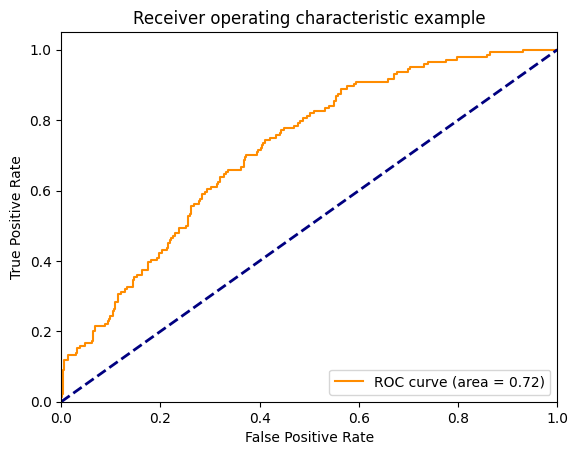

In [ ]:
from sklearn import metrics

y_pred_proba = LogReg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr, color ="darkorange", label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()